In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb
import catboost as cb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import warnings
warnings.filterwarnings("ignore")


The Dataset we use here for Airbnb New York dataset is :- (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data. )

In [4]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#metadata of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.shape

(48895, 16)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


The price and availability_365 have 0 value which is wrong istead of that they should be none

In [8]:
data.loc[data['price'] == 0, 'price'] = np.nan
data.loc[data['availability_365'] == 0, 'availability_365'] = np.nan

In [9]:
# Airbnb listings grouped by their room type, andthe mean price and count of listings calculated for each room type.
room_type = data.groupby('room_type').agg(
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    count=('price', 'count')
)
    
room_type

,avg_price,max_price,count
room_type,,,
Entire home/apt,211.810918,10000.0,25407
Private room,89.809131,10000.0,22319
Shared room,70.248705,1800.0,1158


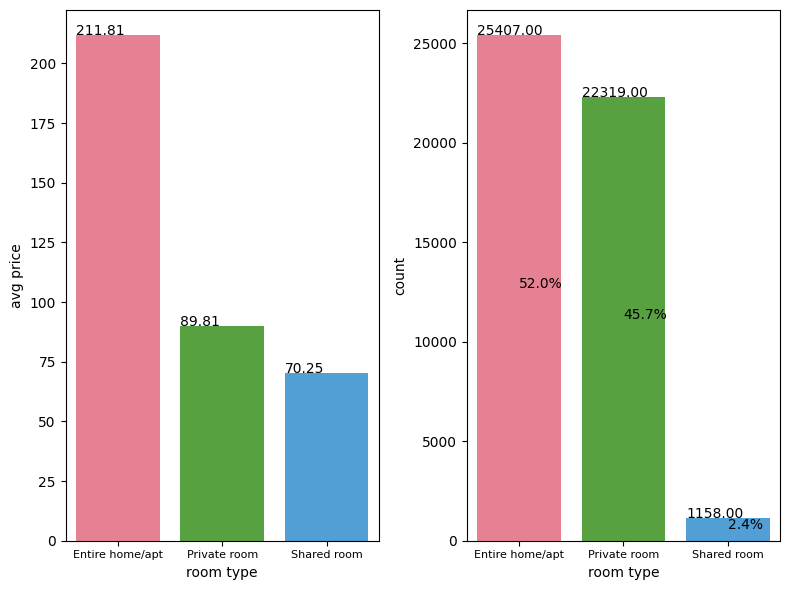

In [10]:
plt.figure(figsize= (8,6))

plt.subplot(1,2,1)
ax1 = sns.barplot(x='room_type', y = 'avg_price', data=room_type, palette= 'husl')
plt.xlabel("room type")
plt.ylabel("avg price")
plt.xticks(fontsize=8)
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))


plt.subplot(1,2,2)
ax2 = sns.barplot(x='room_type', y = 'count', data=room_type, palette= 'husl')
plt.xlabel("room type")
plt.ylabel("count")
plt.xticks(fontsize=8)

total_count = room_type['count'].sum()
for p in ax2.patches:
    ax2.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))
for p in ax2.patches:
    percentage = (p.get_height() / total_count) * 100  # Calculate percentage
    ax2.annotate(f'{percentage:.1f}%',  # Format to 1 decimal place
                 (p.get_x() + p.get_width() / 2, p.get_height() / 2))


plt.tight_layout()
plt.show()


In [11]:
#Avg. price and listings per neighbourhood_group(large area)
neighbourhood_group_df = data.groupby('neighbourhood_group').agg(
    avg_price=('price','mean'),
    max_price=('price', 'max'),
    count=('price','count')).reset_index()
    
neighbourhood_group_df

,neighbourhood_group,avg_price,max_price,count
0,Bronx,87.577064,2500.0,1090
1,Brooklyn,124.438915,10000.0,20095
2,Manhattan,196.884903,10000.0,21660
3,Queens,99.517649,10000.0,5666
4,Staten Island,114.812332,5000.0,373


Text(0, 0.5, '')

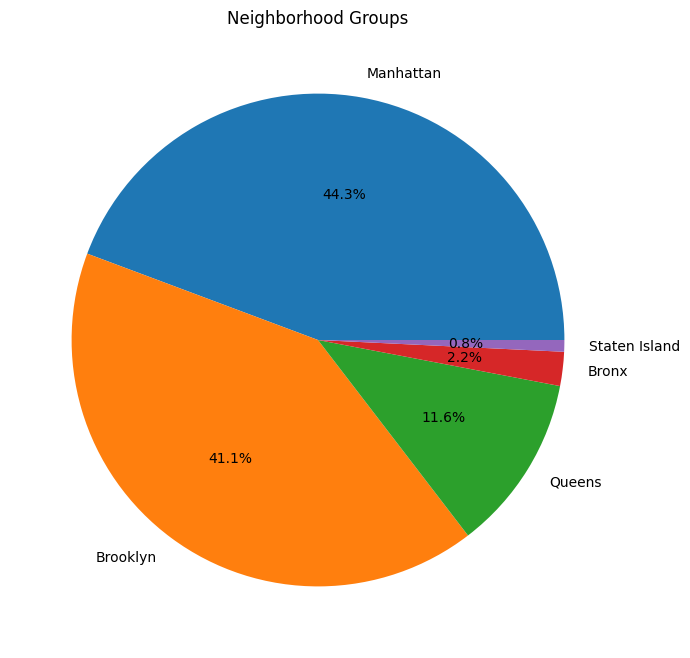

In [12]:
#Pie chart to show listings in each neighbourhood group
plt.figure(figsize= (8,8))
data.neighbourhood_group.value_counts().plot.pie(title='Neighborhood Groups',autopct='%1.1f%%')
plt.ylabel(None)

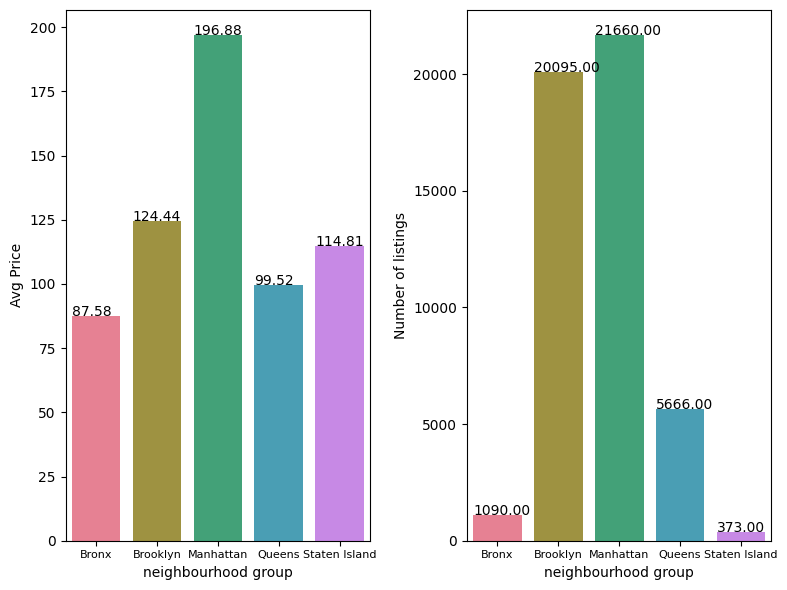

In [13]:
plt.figure(figsize= (8,6))

plt.subplot(1,2,1)
ax1 = sns.barplot(x='neighbourhood_group', y = 'avg_price', data=neighbourhood_group_df, palette= 'husl')
plt.xlabel("neighbourhood group")
plt.ylabel("Avg Price")
plt.xticks(fontsize=8)
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))


plt.subplot(1,2,2)
ax2 = sns.barplot(x='neighbourhood_group', y = 'count', data=neighbourhood_group_df, palette= 'husl')
plt.xlabel("neighbourhood group")
plt.ylabel("Number of listings")
plt.xticks(fontsize=8)

total_count = room_type['count'].sum()
for p in ax2.patches:
    ax2.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))


plt.tight_layout()
plt.show()

In [14]:
# Number of distinct neighbourhoods.
print("Total number of unique locations in neighbouhoods are -", data["neighbourhood"].nunique())

Total number of unique locations in neighbouhoods are - 221


Text(0.5, 1.0, 'Top 10 Neighbourhood')

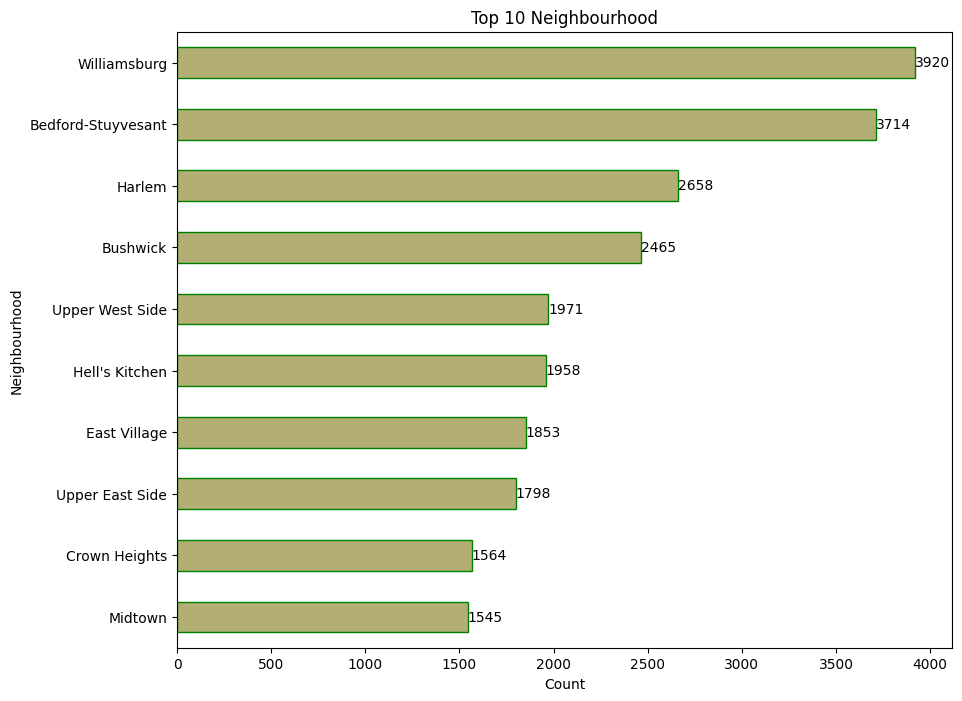

In [15]:
#Horizontal bar chart showing top 10 neighborhoods in the dataset based on the number of listings.
plt.figure(figsize=(10,8))

ax = data["neighbourhood"].value_counts().head(10).sort_values().plot(kind = "barh", color = "#b3af74",edgecolor="green",grid =False)
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10), 
plt.xlabel("Count")
plt.ylabel("Neighbourhood")
plt.title("Top 10 Neighbourhood")

Text(0.5, 1.0, 'Top 10 Neighbourhood with Highest Avg. Prices')

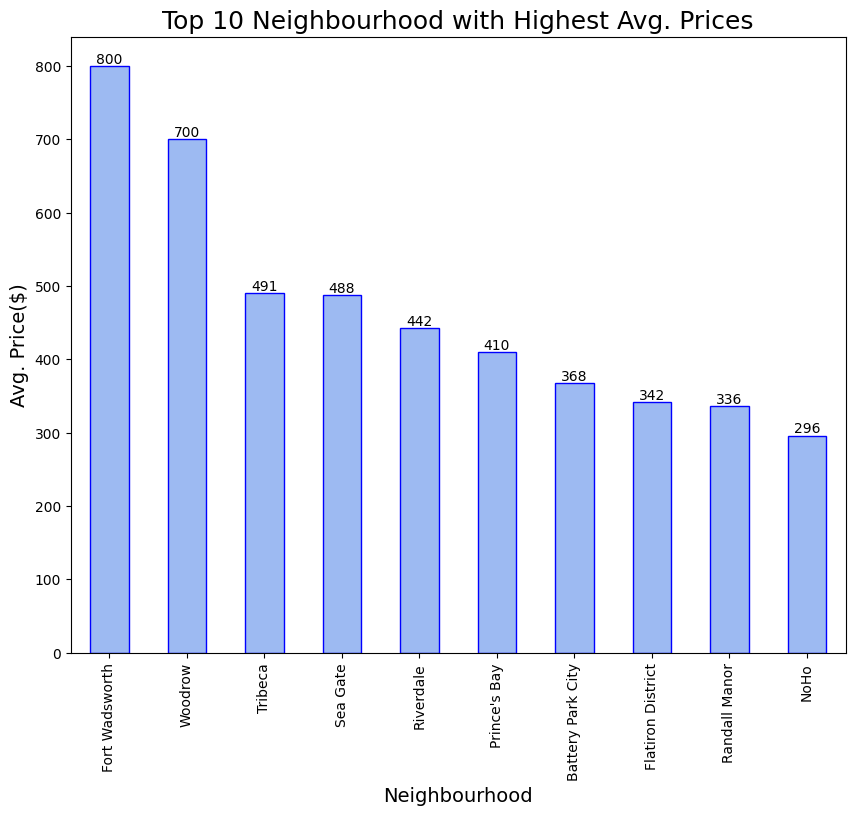

In [16]:
# Vertical bar chart to display the top 10 neighborhoods in the dataset based on the average listing price.
plt.figure(figsize=(10,8))

ax = data.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending=False).head(10).plot(kind = "bar", color = "#9dbaf2", edgecolor="blue", grid = False)
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Avg. Price($)", size = 14)
plt.title("Top 10 Neighbourhood with Highest Avg. Prices", size = 18)

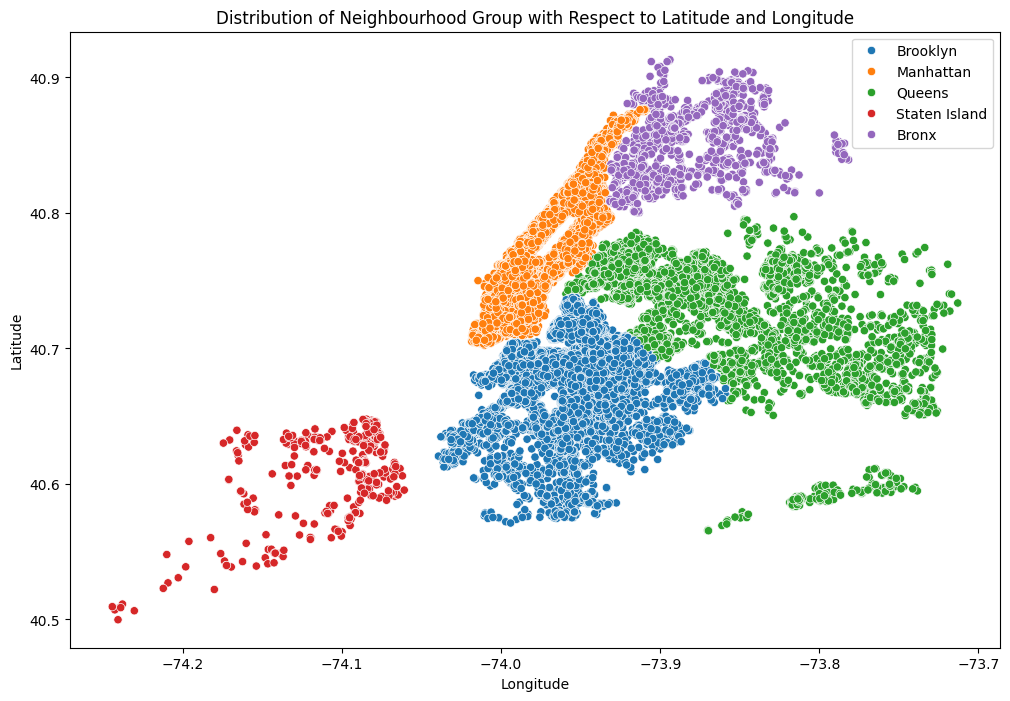

In [17]:
#Scatter plot to display the distribution of neighborhood groups with respect to latitude and longitude. 
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x="longitude", y="latitude", hue="neighbourhood_group")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Distribution of Neighbourhood Group with Respect to Latitude and Longitude")
plt.legend()

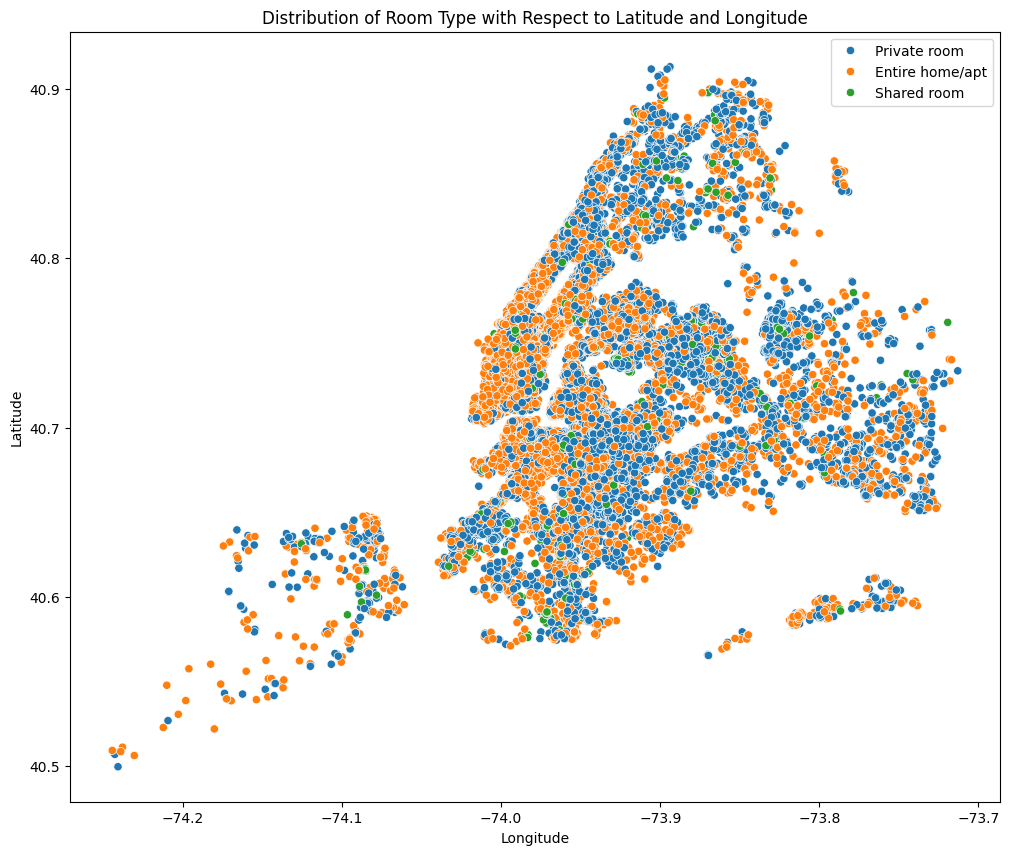

In [18]:
# Scatter plot to display the distribution of room types with respect to latitude and longitude. 
plt.figure(figsize=(12,10))
sns.scatterplot(data = data, x="longitude", y="latitude", hue="room_type")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Distribution of Room Type with Respect to Latitude and Longitude")
plt.legend()

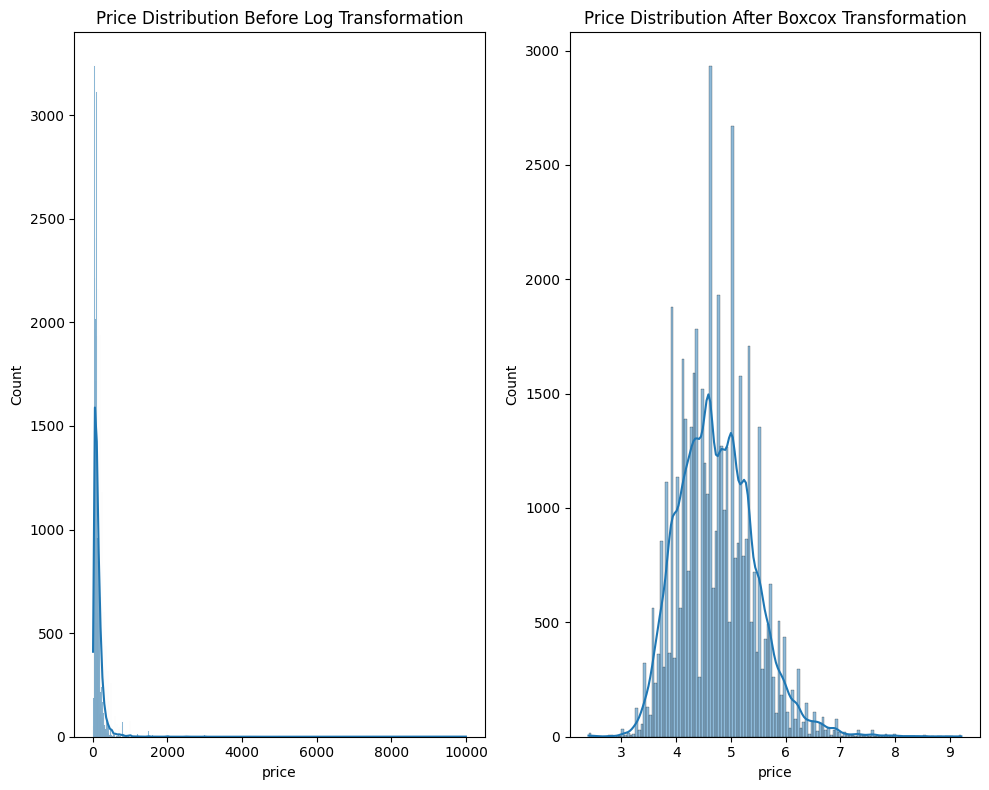

In [19]:
# Figure with two subplots to display the distribution of listing prices before and after transformation. 
import scipy.stats as stats

transformed_data = np.log1p(data.price)

plt.figure(figsize= (10,8))

plt.subplot(1,2,1)
sns.histplot(data = data, x="price", kde=True)
plt.title("Price Distribution Before Log Transformation")


plt.subplot(1,2,2)
sns.histplot(data = transformed_data, kde=True)
plt.title("Price Distribution After Boxcox Transformation")

plt.tight_layout()
plt.show()

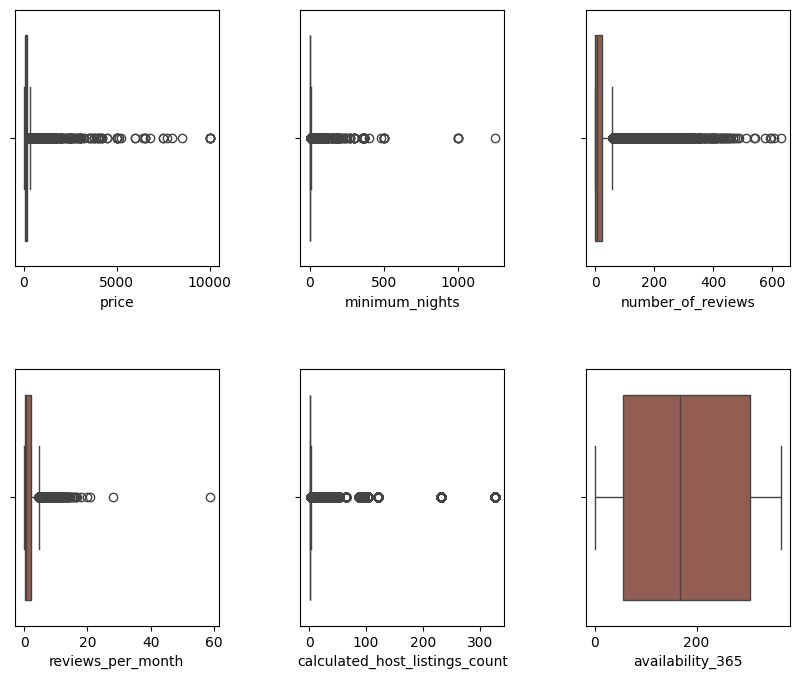

In [20]:
# Figure with six subplots to display boxplots for different numerical features in the dataset.
columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count",
          "availability_365"]
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(columns):
    ax = fig.add_subplot(2, 3, num +1)
    ax = sns.boxplot(x=data[column_name], color='#9d5647')

In [21]:
# Calculation lower and upper limits for removing outliers from the 'price' feature using the interquartile range (IQR) method and remove outliers.
q1_price = data["price"].quantile(0.25)
q3_price = data["price"].quantile(0.75)
iqr_price = q3_price - q1_price
lower_limit_price = q1_price - 1.5 * iqr_price
upper_limit_price = q3_price + 1.5 * iqr_price

df_filter_price = data[(data["price"] > lower_limit_price) & (data["price"] < upper_limit_price)]

df = df_filter_price

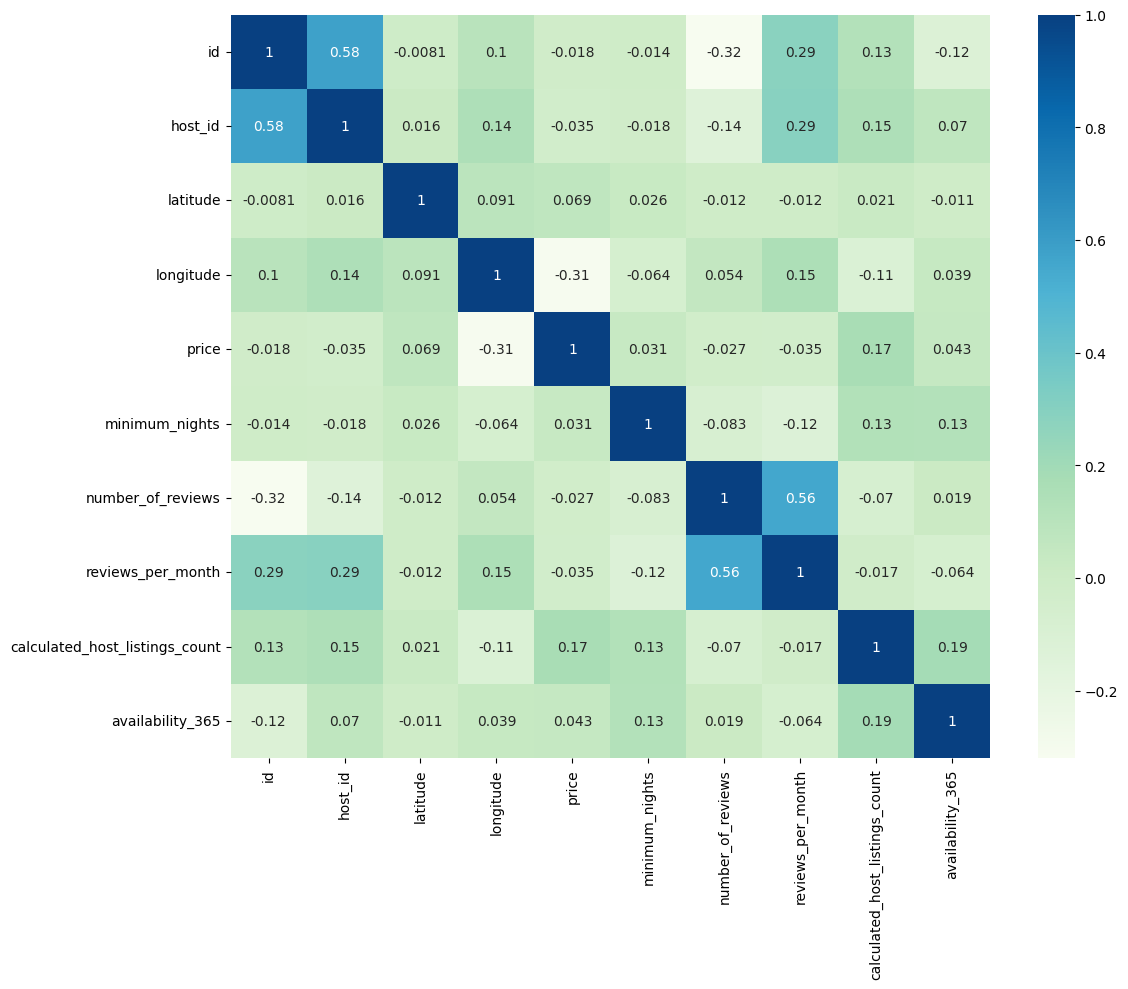

In [22]:
# Heatmap to visualize the correlation between different features in the 'df' dataframe.
plt.figure(figsize=(12,10))
df_corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(df_corr, annot=True, cmap="GnBu")
plt.tight_layout()

In [23]:
# Looking at null values in the dataset
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [24]:
data[data['last_review'].isnull()][['number_of_reviews','reviews_per_month']]

,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN
...,...,...
48890,0,NaN
48891,0,NaN
48892,0,NaN
48893,0,NaN


In [25]:
data.fillna({'reviews_per_month':0}, inplace=True)
data.drop('last_review', inplace=True, axis=1)
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [26]:
data['price'] = data['price'].fillna(
    data.groupby(['room_type', 'neighbourhood'])['price'].transform('mean')
)
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

Now we will analyze availability_365 column to see how we fill missing values

In [27]:
print(data["availability_365"].describe())
print("\nNumber of missing values:", data["availability_365"].isnull().sum())


count    31362.000000
mean       175.831994
std        126.187636
min          1.000000
25%         55.000000
50%        168.000000
75%        305.000000
max        365.000000
Name: availability_365, dtype: float64

Number of missing values: 17533


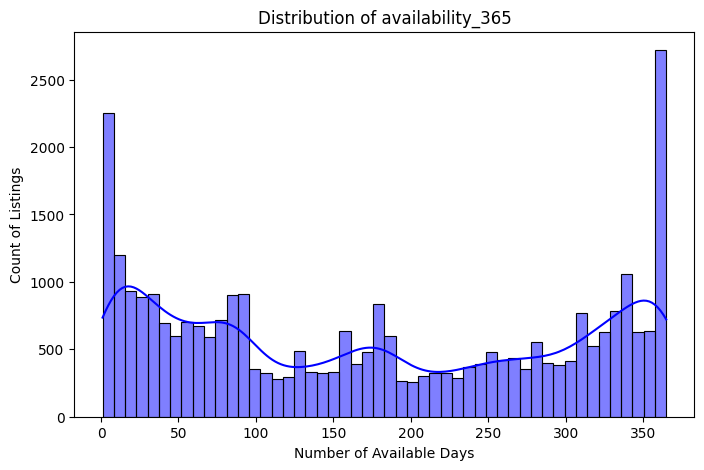

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data["availability_365"], bins=50, kde=True, color="blue")
plt.title("Distribution of availability_365")
plt.xlabel("Number of Available Days")
plt.ylabel("Count of Listings")
plt.show()


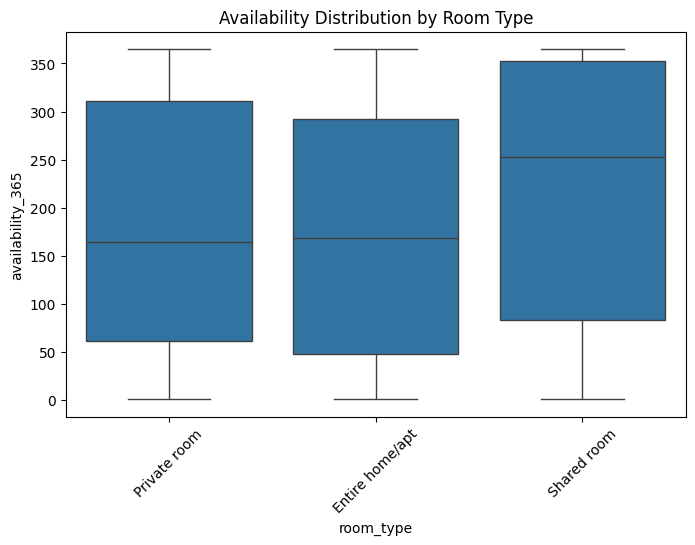

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="availability_365", data=data)
plt.title("Availability Distribution by Room Type")
plt.xticks(rotation=45)
plt.show()


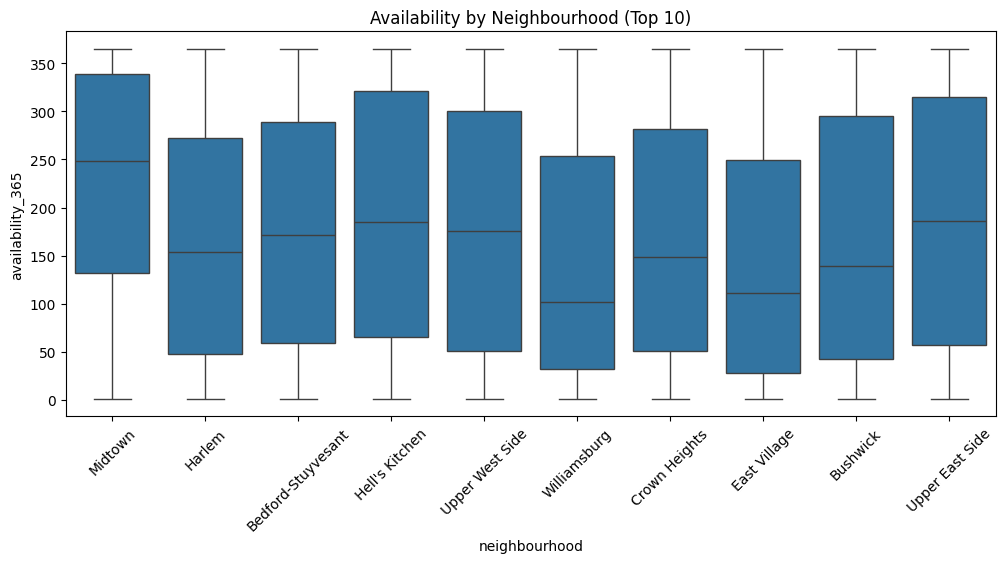

In [30]:
plt.figure(figsize=(12,5))
top_neighbourhoods = data["neighbourhood"].value_counts().index[:10]
sns.boxplot(x="neighbourhood", y="availability_365", data=data[data["neighbourhood"].isin(top_neighbourhoods)])
plt.title("Availability by Neighbourhood (Top 10)")
plt.xticks(rotation=45)
plt.show()


Since neighbourhood influences availability, and shared rooms have a different median, we use group-wise filling

In [31]:
data["availability_365"] = data.groupby(["room_type", "neighbourhood"])["availability_365"].transform(lambda x: x.fillna(x.median()))
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                  25
dtype: int64

there are still 25 null values, which we fill according to room type

In [32]:
data["availability_365"] = data.groupby(["room_type"])["availability_365"].transform(lambda x: x.fillna(x.median()))
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [33]:
data.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)

In [34]:
X = data.drop("price", axis = 1)
y = data["price"]

In [35]:
# Split in an appropriate ratio for enough train data and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

Encoding is a vital process where categorical variable are transformed into numerical format. One-hot en-coding was adopted on ‘room type’, ‘neighbourhood group’, and ‘neighbourhood’. It was ensured that multi-collinearity was avoided while encoding. It resulted in a total of 235 features.

In [36]:
categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training data, transform both train and test
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]), columns=ohe.get_feature_names_out(), index=X_train.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test[categorical_columns]), columns=ohe.get_feature_names_out(), index=X_test.index)

# Drop original categorical columns
X_train = X_train.drop(columns=categorical_columns).join(X_train_ohe)
X_test = X_test.drop(columns=categorical_columns).join(X_test_ohe)


In [37]:
# Using StandardScaler to scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
classic_ml_models = []
ensemble_bagging_methods = []
ensemble_boosting_methods = []

In [39]:
# Here the model will complete the learning process and all evaluation metrics can be simultaneously obtained.
def test_models(X_train, X_test, y_train, y_test, model, model_name, models):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = r2_score(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_crossval = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    #calculate cross val score on negative mse and then finding mean and then rmse of that
    
    row = {"Model": model_name, "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_crossval}

    display(pd.DataFrame([row]))
    models.append(row)

Funtion for visualising the results together for comparison

In [40]:
def compare_models(models, rotation):

    display(models)
    plt.figure(figsize=(20, 10))

    # Adjust vertical space between subplots
    plt.subplots_adjust(hspace=1.2)

    # Subplot 1: Test Scores
    ax1 = plt.subplot(3, 2, 1)
    sns.lineplot(x=models["Model"], y=models["Test Sc."], marker="o", color="#b4241c", ax=ax1)
    ax1.set_title("Test Scores Comparison", size=8)
    ax1.tick_params(labelrotation=rotation)
    ax1.set_xlabel(None)

    # Subplot 2: Train Scores
    ax2 = plt.subplot(3, 2, 2)
    sns.lineplot(x=models["Model"], y=models["Train Sc."], marker="o", color="#b4241c", ax=ax2)
    ax2.set_title("Train Scores Comparison", size=8)
    ax2.tick_params(labelrotation=rotation)
    ax2.set_xlabel(None)

    # Subplot 3: MAE Scores
    ax3 = plt.subplot(3, 2, 3)
    sns.lineplot(x=models["Model"], y=models["MAE"], marker="o", color="#b4241c", ax=ax3)
    ax3.set_title("MAE Scores Comparison", size=8)
    ax3.tick_params(labelrotation=rotation)
    ax3.set_xlabel(None)

    # Subplot 4: MSE Scores
    ax4 = plt.subplot(3, 2, 4)
    sns.lineplot(x=models["Model"], y=models["MSE"], marker="o", color="#b4241c", ax=ax4)
    ax4.set_title("MSE Scores Comparison", size=8)
    ax4.tick_params(labelrotation=rotation)
    ax4.set_xlabel(None)

    # Subplot 5: RMSE Scores
    ax5 = plt.subplot(3, 2, 5)
    sns.lineplot(x=models["Model"], y=models["RMSE"], marker="o", color="#b4241c", ax=ax5)
    ax5.set_title("RMSE Scores Comparison", size=8)
    ax5.tick_params(labelrotation=rotation)
    ax5.set_xlabel(None)

    # Subplot 6: RMSE CV Scores
    ax6 = plt.subplot(3, 2, 6)
    sns.lineplot(x=models["Model"], y=models["RMSE CV"], marker="o", color="#b4241c", ax=ax6)
    ax6.set_title("RMSE CV Scores Comparison", size=8)
    ax6.tick_params(labelrotation=rotation)
    ax6.set_xlabel(None)

    # Show the plot
    plt.show()

###Different Models

In [41]:

ridge = Ridge(alpha=1.0)
test_models(X_train, X_test, y_train, y_test, ridge, "Ridge Regression",classic_ml_models )

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Ridge Regression,0.132589,0.108304,68.051259,38369.630384,195.881674,234.413335


In [42]:

lasso = Lasso(alpha = 0.1)
test_models(X_train, X_test, y_train, y_test, lasso, "Lasso Regression", classic_ml_models)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Lasso Regression,0.132594,0.108219,67.941684,38369.395381,195.881075,234.37772


In [43]:
# Hyperparameter set to intermediate value of 60 to prevent underfitting or overfitting.
dtr = DecisionTreeRegressor(min_samples_leaf=60)
test_models(X_train, X_test, y_train, y_test, dtr, "Decision Tree", classic_ml_models)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Decision Tree,0.159883,0.173812,64.663308,37162.276361,192.775196,233.761582


###Comparison of classic ML methods

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Ridge Regression,0.132589,0.108304,68.051259,38369.630384,195.881674,234.413335
1,Lasso Regression,0.132594,0.108219,67.941684,38369.395381,195.881075,234.377720
2,Decision Tree,0.159883,0.173812,64.663308,37162.276361,192.775196,233.761582


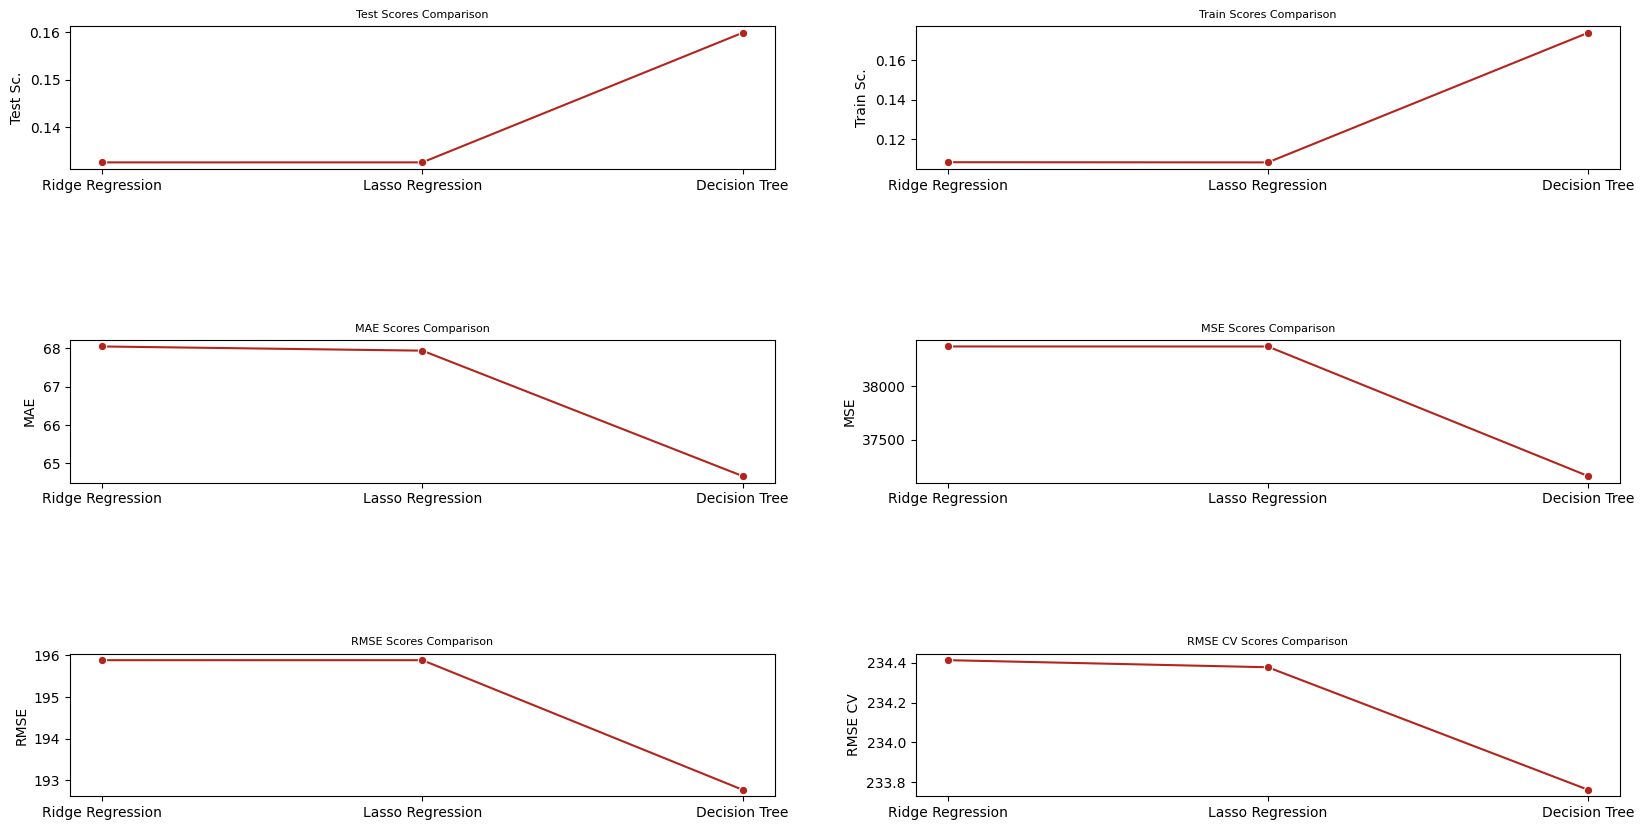

In [44]:
compare_models(pd.DataFrame(classic_ml_models),0)

We see that the Decision tree got the highest accuracy and the least errors in comparison from the other algorithms.

In [45]:
# Once the model completes the learning process, all evaluation metrics can be simultaneously obtained.
def test_models_bag(X_train, X_test, y_train, y_test, model, model_name, models, param_grid):

    rf_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid,
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_ )
    best_model = rf_random.best_estimator_

    
    y_pred = best_model.predict(X_test)

    test_score = r2_score(y_test, y_pred)
    train_score = best_model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_cv = np.sqrt(-cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    
    row = {"Model": model_name, "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_cv}

    display(pd.DataFrame([row]))
    models.append(row)

In [46]:
rfr = RandomForestRegressor()
test_models(X_train, X_test, y_train, y_test, rfr, "Random Forest ", ensemble_bagging_methods)

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

test_models_bag(X_train, X_test, y_train, y_test, rfr, "Random Forest with Best hyperp", ensemble_bagging_methods, param_grid)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Random Forest,0.121037,0.86538,63.144607,38880.647138,197.181762,243.027834


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Random Forest with Best hyperp,0.205388,0.54205,60.168865,35149.402372,187.481739,227.622307


In [47]:
etr = ExtraTreesRegressor()

test_models(X_train, X_test, y_train, y_test, etr, "Extra Tree ", ensemble_bagging_methods)

param_grid = {'n_estimators': [50, 100, 150, 200, 300],
              'max_depth': [10, 20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5],
              'max_features': ['auto', 'sqrt', 'log2']}

test_models_bag(X_train, X_test, y_train, y_test, etr, "Extra-Tree with Best hyperp", ensemble_bagging_methods, param_grid)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Extra Tree,-0.036731,0.999999,65.491932,45859.437256,214.148167,244.809169


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Extra-Tree with Best hyperp,0.177638,0.279443,62.333904,36376.91619,190.727335,230.85366


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Random Forest,0.121037,0.865380,63.144607,38880.647138,197.181762,243.027834
1,Random Forest with Best hyperp,0.205388,0.542050,60.168865,35149.402372,187.481739,227.622307
2,Extra Tree,-0.036731,0.999999,65.491932,45859.437256,214.148167,244.809169
3,Extra-Tree with Best hyperp,0.177638,0.279443,62.333904,36376.916190,190.727335,230.853660


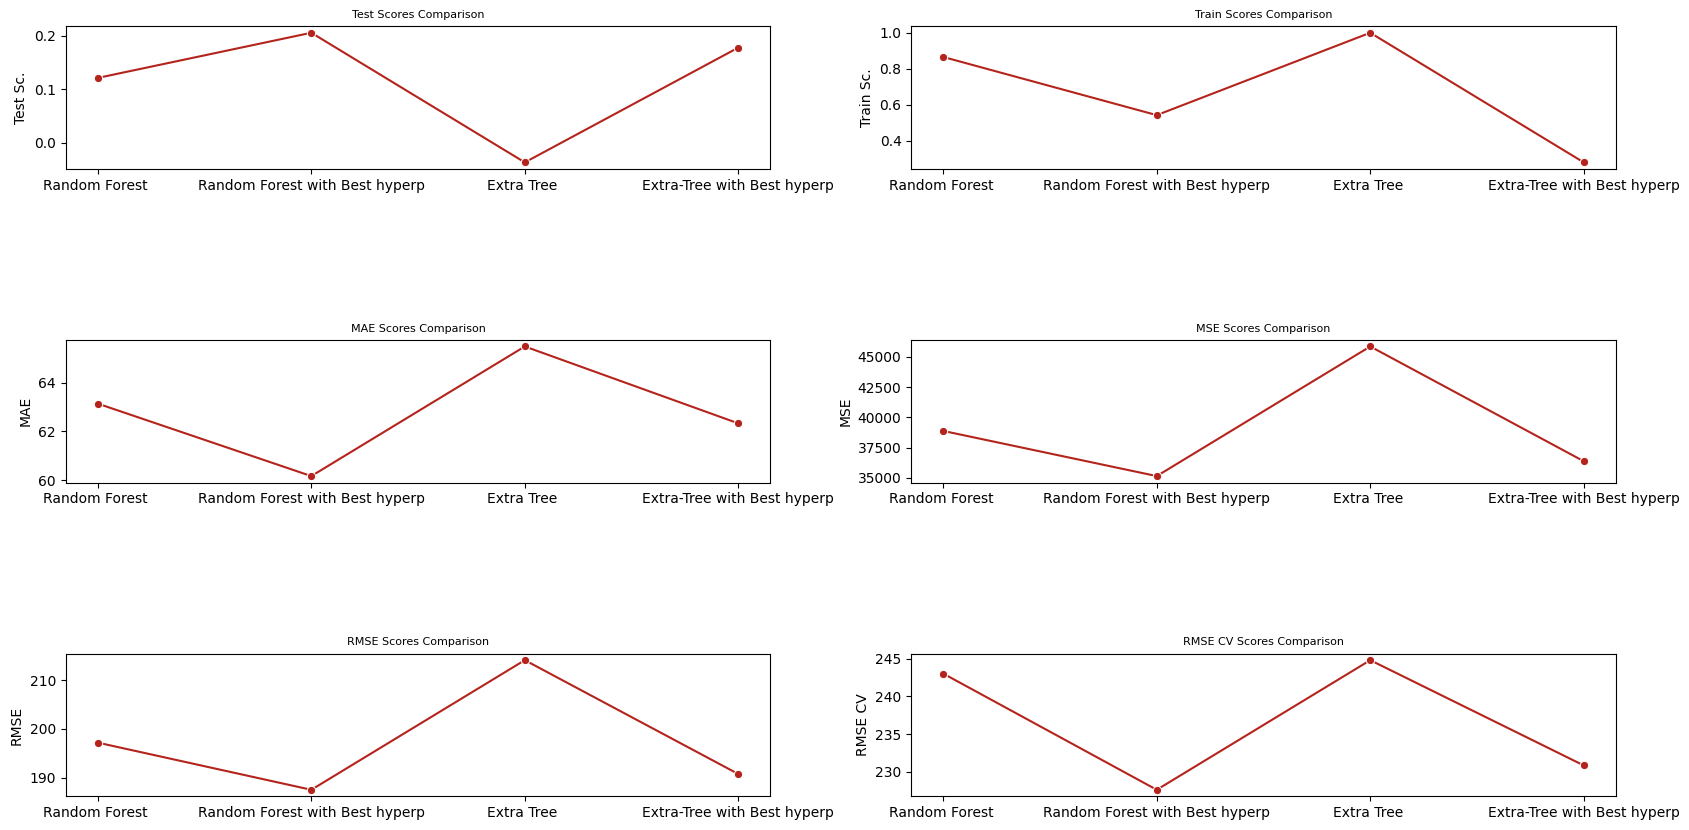

In [48]:
compare_models(pd.DataFrame(ensemble_bagging_methods),0)

In [49]:
gbr = GradientBoostingRegressor()

test_models(X_train, X_test, y_train, y_test, gbr, "Gradient Boosting", ensemble_boosting_methods)

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
    "alpha": [0.5, 0.9, 1.2, 1.5],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [5, 10, 15, 20, 30],
    "n_estimators": [100, 150, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

test_models_bag(X_train, X_test, y_train, y_test, gbr, "Gradient Boosting with Best hyperp", ensemble_boosting_methods, param_grid)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Gradient Boosting,0.149618,0.289955,64.122487,37616.357808,193.949369,236.078461


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.01, 'alpha': 0.5}


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Gradient Boosting with Best hyperp,0.186644,0.322786,62.288564,35978.541953,189.680104,229.244793


In [56]:
xgbr = xgb.XGBRegressor(tree_method='hist')

test_models(X_train, X_test, y_train, y_test, xgbr, "XGBoost", ensemble_boosting_methods)

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [10, 15, 20, 30],
    "n_estimators": [100, 150, 200, 300],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
}

test_models_bag(X_train, X_test, y_train, y_test, xgbr, "XGBoost with Best hyperp", ensemble_boosting_methods, param_grid)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,XGBoost,-0.000347,0.716487,65.559716,44250.008923,210.356861,246.307987


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 0.8, 'reg_lambda': 2, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,XGBoost with Best hyperp,0.208879,0.44126,60.626466,34994.985936,187.069468,226.044744


In [57]:
cbr = cb.CatBoostRegressor(silent=True, task_type='CPU')

test_models(X_train, X_test, y_train, y_test, cbr, "CATBoost", ensemble_boosting_methods)

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "depth": [3, 5, 8, 10, 12, 14, 16],
    "iterations": [200, 500, 700, 1000]
}
test_models_bag(X_train, X_test, y_train, y_test, cbr, "CATBoost with Best hyperp", ensemble_boosting_methods, param_grid)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,CATBoost,0.136358,0.601824,62.706257,38202.930167,195.455699,234.864182


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'learning_rate': 0.05, 'iterations': 200, 'depth': 12}


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,CATBoost with Best hyperp,0.188817,0.486295,61.800551,35882.421372,189.426559,227.283071


,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Gradient Boosting,0.149618,0.289955,64.122487,37616.357808,193.949369,236.078461
1,Gradient Boosting with Best hyperp,0.186644,0.322786,62.288564,35978.541953,189.680104,229.244793
2,XGBoost,-0.000347,0.716487,65.559716,44250.008923,210.356861,246.307987
3,XGBoost with Best hyperp,0.208879,0.441260,60.626466,34994.985936,187.069468,226.044744
4,CATBoost,0.136358,0.601824,62.706257,38202.930167,195.455699,234.864182
5,CATBoost with Best hyperp,0.188817,0.486295,61.800551,35882.421372,189.426559,227.283071


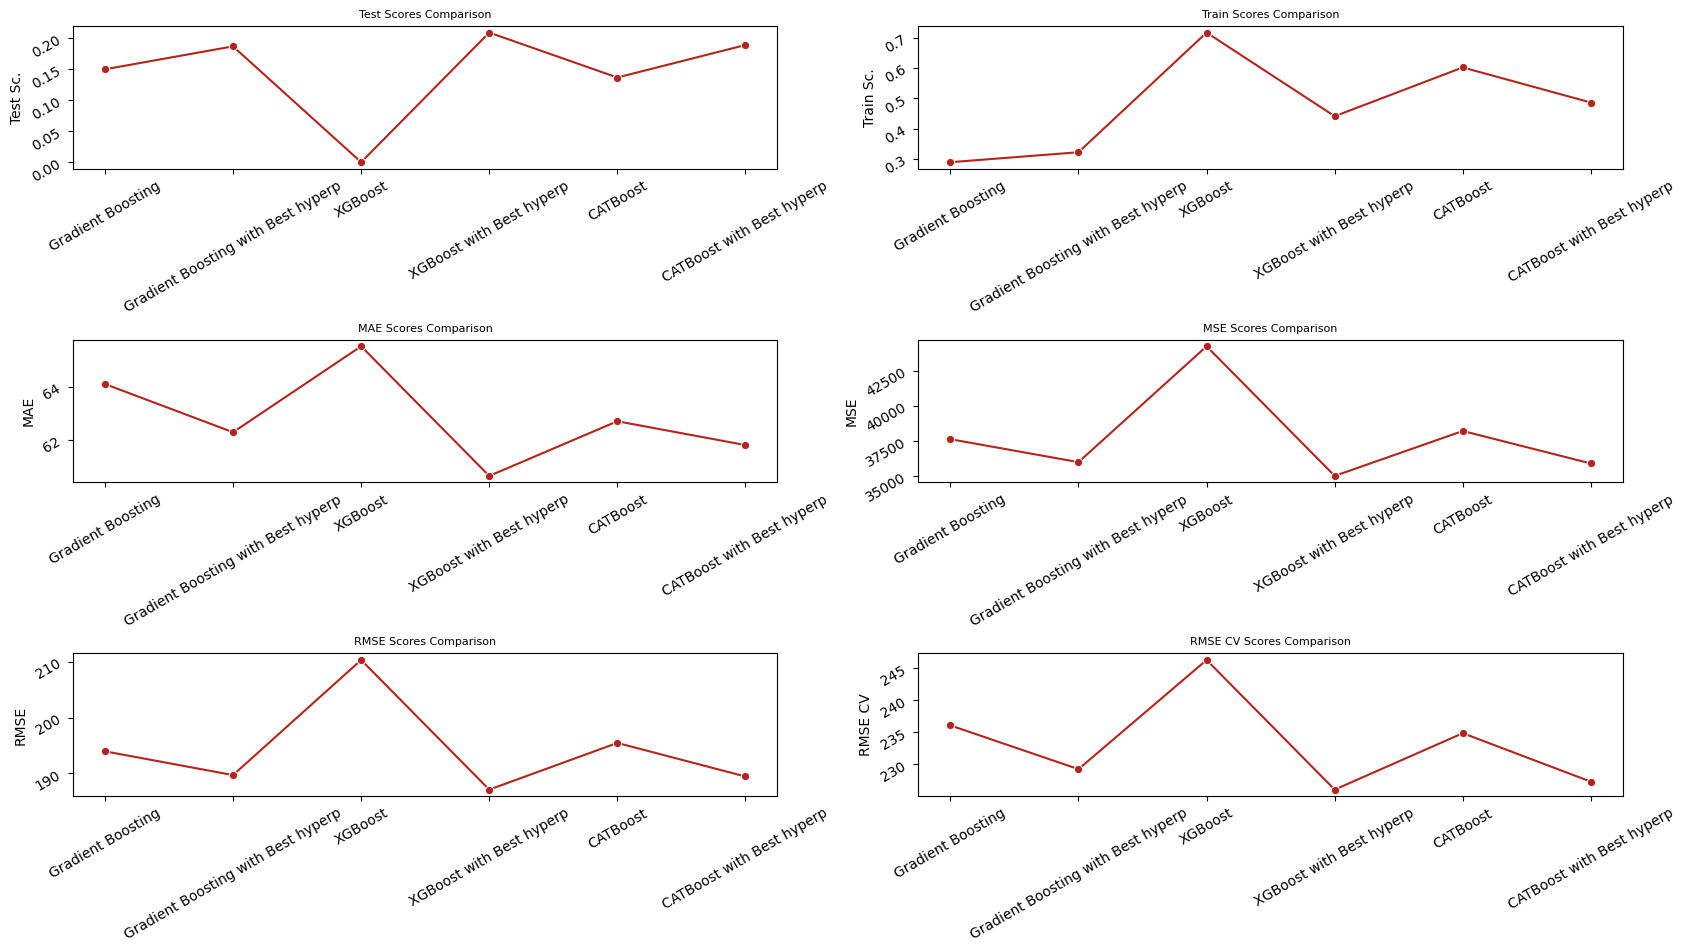

In [58]:
compare_models(pd.DataFrame(ensemble_boosting_methods),30)

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Ridge Regression,0.132589,0.108304,68.051259,38369.630384,195.881674,234.413335
1,Lasso Regression,0.132594,0.108219,67.941684,38369.395381,195.881075,234.377720
2,Decision Tree,0.159883,0.173812,64.663308,37162.276361,192.775196,233.761582
3,Random Forest,0.121037,0.865380,63.144607,38880.647138,197.181762,243.027834
4,Random Forest with Best hyperp,0.205388,0.542050,60.168865,35149.402372,187.481739,227.622307
5,Extra Tree,-0.036731,0.999999,65.491932,45859.437256,214.148167,244.809169
6,Extra-Tree with Best hyperp,0.177638,0.279443,62.333904,36376.916190,190.727335,230.853660
7,Gradient Boosting,0.149618,0.289955,64.122487,37616.357808,193.949369,236.078461
8,Gradient Boosting with Best hyperp,0.186644,0.322786,62.288564,35978.541953,189.680104,229.244793
9,XGBoost,-0.000347,0.716487,65.559716,44250.008923,210.356861,246.307987


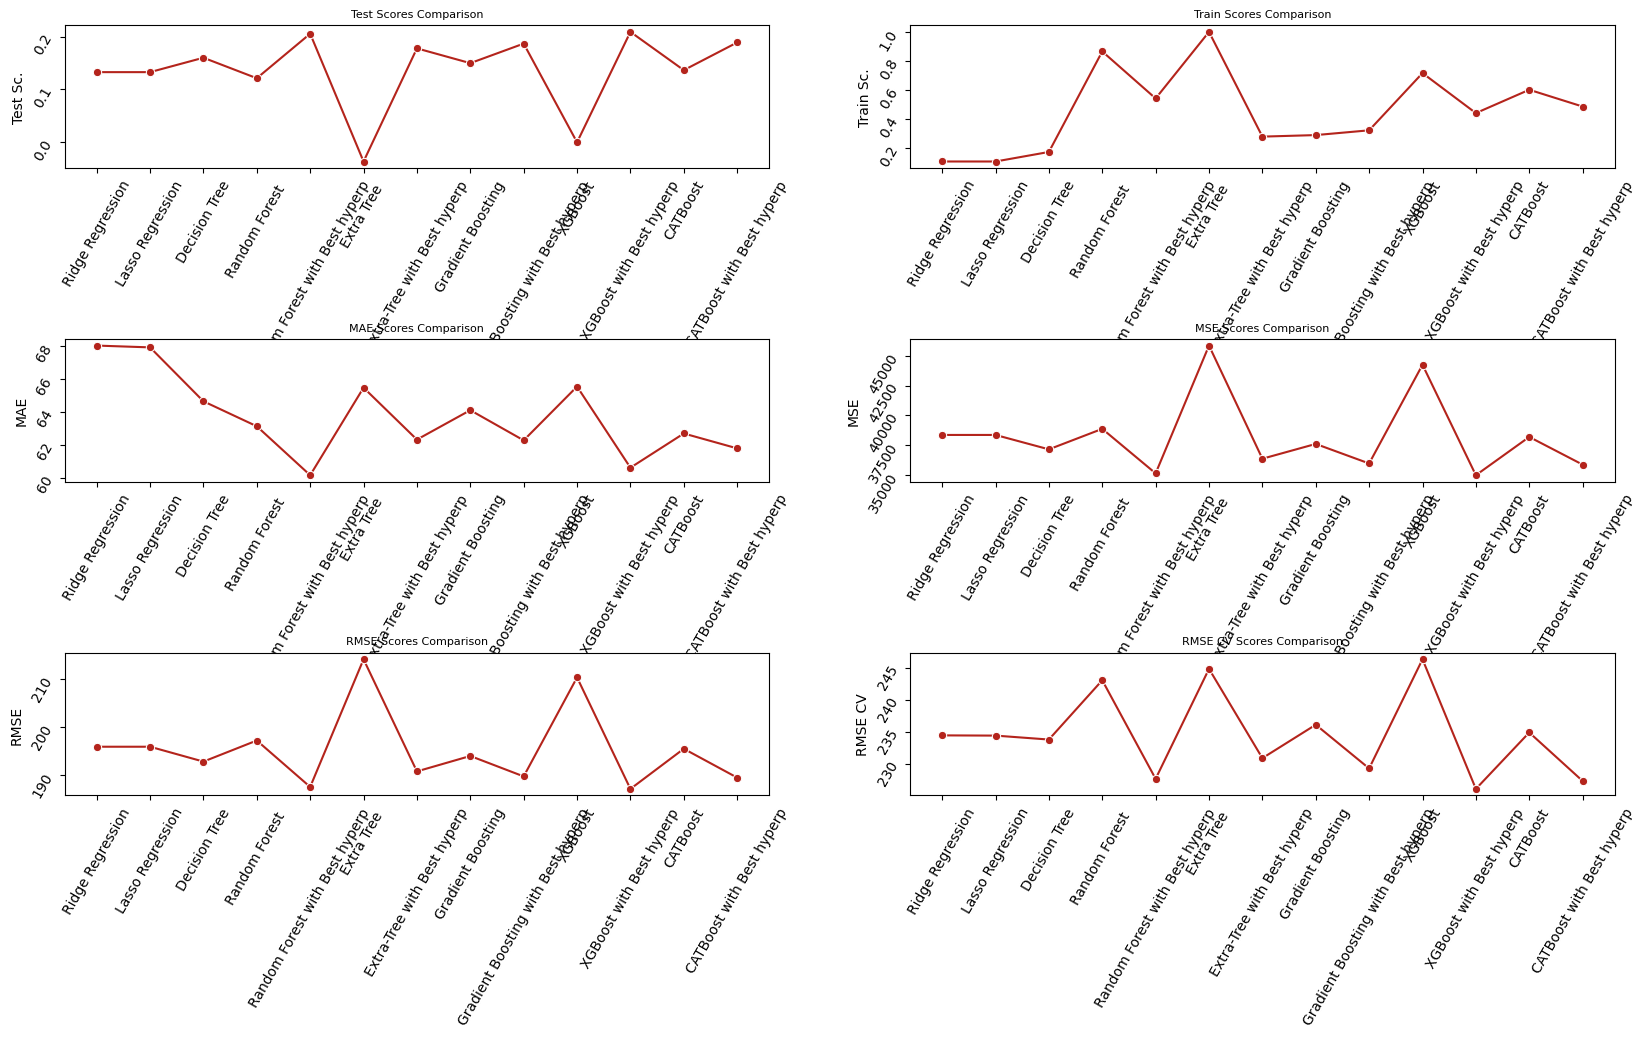

In [59]:
compare_models(pd.DataFrame(classic_ml_models+ensemble_bagging_methods+ensemble_boosting_methods),60)

#Comments

Of all the evaluated models and methods, the hyper-tuned XGBoost model gave the best results and the Lasso regression gave the worst results. The ensemble methods clearly outperform the classical machine learning models for Airbnb price prediction problem because it helps in the reduction in the variance component of prediction errors made by the contributing models. Moreover, the hyper-tuning further improved the results, which can be further enhanced using a grid search instead of a random search.